We will exercise with DBSCAN to understand why it exists vs k-means. We will use it on make_moons dataset from sklearn.datasets.

This dataset has non-spherical clusters (where k-means would fail given its designed to give spherical clusters). In non-convex datasets like the make_moons we need to use a density based algorithm that follows the "chain" of data pooints. It is also a small dataset, intuitive and fully reproducible. We first generate the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.1, random_state=42)

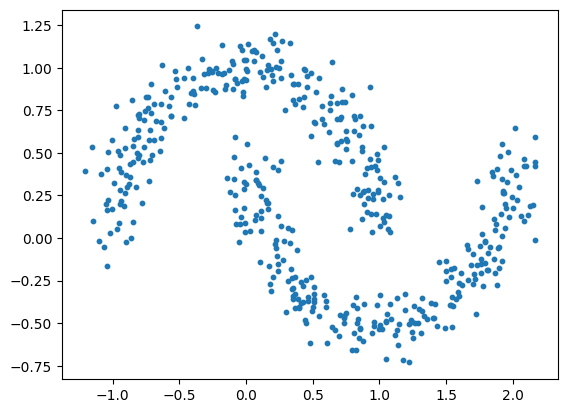

In [9]:
plt.scatter(X[:,0], X[:,1], s=10)


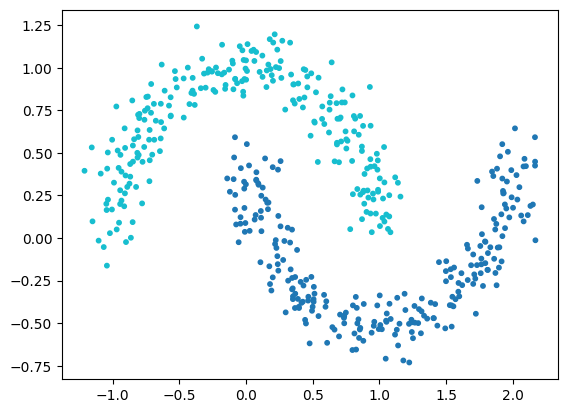

In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
'''eps -> radius of neighborhood. min_samples = min_number of samples in a
neiborhood. Effectively controls robustness to noise.
'''
labels = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, s=10, cmap='tab10')
plt.show()

We will use also k-means for comparison.

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


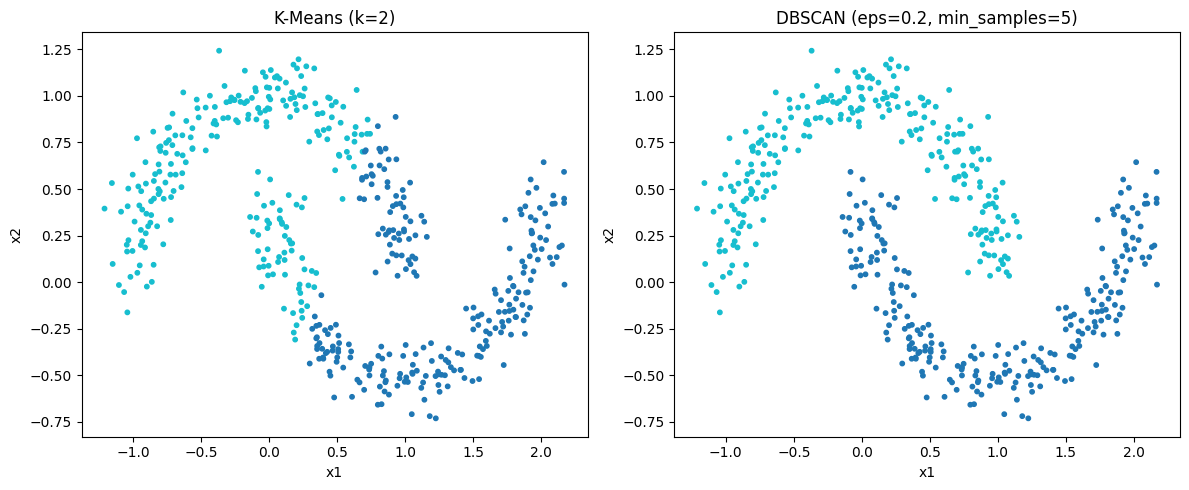

In [30]:
# ------------------
# Plot comparison
# ------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="tab10", s=10)
axes[0].set_title("K-Means (k=2)")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=10)
axes[1].set_title("DBSCAN (eps=0.2, min_samples=5)")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")

plt.tight_layout()
plt.show()